# Data Spliting

In [2]:
# Installing imblearn library
!pip install imblearn

  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [1]:
# Importing libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# loading the dataset
raw_data = r'D:\College\Term 4\Project\TBC-AIP-2023-A4_Deepsight-Analytics\Data\raw\Deep Sight Analytics creditcard_cc.csv'
df=pd.read_csv(raw_data)

In [3]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Checking size of creditcard Dataset
df.shape

(284807, 31)

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0.5, 1.0, 'Distribution of the Class')

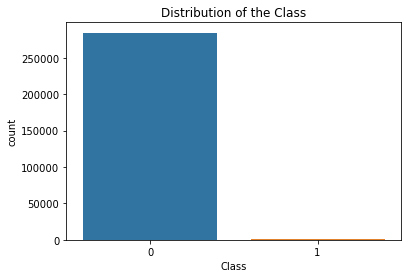

In [6]:
sns.countplot(df['Class'])
plt.title('Distribution of the Class')

In [7]:
def split_dataset(features, target):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 0)
    train = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
    test = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test)], axis=1)
    
    train_output = r'D:\College\Term 4\Project\TBC-AIP-2023-A4_Deepsight-Analytics\Data\processed\Split_data\Train.csv'
    test_output = r'D:\College\Term 4\Project\TBC-AIP-2023-A4_Deepsight-Analytics\Data\processed\Split_data\Test.csv'


    # save the train and test file as csv files
    train.to_csv(train_output, index=False)
    test.to_csv(test_output, index=False)
    
    print("X_train : ",X_train.shape)
    print("X_test : ",X_test.shape)
    print("y_train : ",y_train.shape)
    print("y_test : ",y_test.shape)
    return X_train, X_test, y_train, y_test

In [8]:
split_dataset(df.drop('Class', axis=1), df['Class'])

X_train :  (213605, 30)
X_test :  (71202, 30)
y_train :  (213605,)
y_test :  (71202,)


(            Time        V1        V2        V3        V4        V5        V6  \
 194763  130747.0  2.047163  0.107987 -1.806515  0.072733  0.248371 -1.744837   
 135660   81344.0  1.282404  0.459864 -0.372286  0.826375  0.463568 -0.466407   
 259186  159004.0 -0.414863  0.012026  1.356386  1.107374  0.813456 -0.156497   
 87387    61662.0 -1.432948  1.478076  0.576724  0.207540 -0.670662 -0.464572   
 267282  162703.0  2.051016 -0.016765 -2.284865  0.302168  0.786895 -0.998558   
 ...          ...       ...       ...       ...       ...       ...       ...   
 211543  138459.0 -1.321976  1.138686 -0.940861  0.154160  0.109802 -0.538822   
 86293    61167.0 -0.627810  0.918729  1.478453  0.213171  0.933695  1.261486   
 122579   76616.0  1.512602 -0.949435 -0.219062 -1.638850 -0.856348 -0.465996   
 152315   97253.0  1.798863 -1.699791 -0.142182 -0.619533 -1.570248  0.083268   
 117952   74887.0 -0.589400  0.747828  1.784781  0.899612  0.257067 -0.001301   
 
               V7        V